In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
with open("data/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

               Date User            Message
0  2017/01/01 20:32   무지  이거보면 왜 갓창정인지 알게된다
1  2017/01/01 21:40  어피치                창정헌
2  2017/01/01 22:19  어피치   라이언은 내일부터 연구실 출근
3  2017/01/01 22:20   무지          파티 하는거 아님
4  2017/01/01 22:39  프로도                헬파티
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162861 entries, 0 to 162860
Data columns (total 3 columns):
Date       162861 non-null object
User       162861 non-null object
Message    162861 non-null object
dtypes: object(3)
memory usage: 3.7+ MB
None


In [3]:
# 시간정보 열 datetime 정보로 변환
data['Date'] = pd.to_datetime(data['Date'])
# 인덱스 넣기
data = data.set_index('Date')
data.head()

,User,Message
Date,,
2017-01-01 20:32:00,무지,이거보면 왜 갓창정인지 알게된다
2017-01-01 21:40:00,어피치,창정헌
2017-01-01 22:19:00,어피치,라이언은 내일부터 연구실 출근
2017-01-01 22:20:00,무지,파티 하는거 아님
2017-01-01 22:39:00,프로도,헬파티


In [4]:
year2017 = data['2017-01-01' : '2017-12-31']
year2018 = data['2018-01-01' : '2018-12-31']
year2019 = data['2019-01-01' : '2019-12-31']

In [5]:
# 제대로 분리되었나 확인
print(year2017.head())
print(year2018.head())
print(year2019.head())

                    User            Message
Date                                       
2017-01-01 20:32:00   무지  이거보면 왜 갓창정인지 알게된다
2017-01-01 21:40:00  어피치                창정헌
2017-01-01 22:19:00  어피치   라이언은 내일부터 연구실 출근
2017-01-01 22:20:00   무지          파티 하는거 아님
2017-01-01 22:39:00  프로도                헬파티
                    User             Message
Date                                        
2018-01-01 00:04:00   무지         새해복 마니받으시게나
2018-01-01 00:05:00  어피치        새해복 많이 받으시오들
2018-01-01 00:06:00   튜브                 들어오
2018-01-01 00:07:00   튜브  12시 00에 딱 초코의몽을 삿다
2018-01-01 00:07:00   무지                   곧
                    User    Message
Date                               
2019-01-01 00:02:00  프로도  쉬발럼들 사랑한다
2019-01-01 00:02:00   무지       사랑한다
2019-01-01 00:02:00   무지      내 친구들
2019-01-01 00:02:00   무지        고맙다
2019-01-01 00:02:00   무지  새해도 잘 부탁해


In [6]:
print(year2017.info())
print(year2018.info())
print(year2019.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92998 entries, 2017-01-01 20:32:00 to 2017-12-31 23:41:00
Data columns (total 2 columns):
User       92998 non-null object
Message    92998 non-null object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52570 entries, 2018-01-01 00:04:00 to 2018-12-31 23:54:00
Data columns (total 2 columns):
User       52570 non-null object
Message    52570 non-null object
dtypes: object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17293 entries, 2019-01-01 00:02:00 to 2019-10-14 19:44:00
Data columns (total 2 columns):
User       17293 non-null object
Message    17293 non-null object
dtypes: object(2)
memory usage: 405.3+ KB
None


In [9]:
slice0 = [msg for msg in list(year2017['Message'])]
slice1 = [msg for msg in list(year2018['Message'])]
slice2 = [msg for msg in list(year2019['Message'])]

In [12]:
print(slice0[:10])
print(slice1[:10])
print(slice2[:10])

['이거보면 왜 갓창정인지 알게된다', '창정헌', '라이언은 내일부터 연구실 출근', '파티 하는거 아님', '헬파티', '헬파이어', '파이어에그', '리마리오', '프로도', '예스']
['새해복 마니받으시게나', '새해복 많이 받으시오들', '들어오', '12시 00에 딱 초코의몽을 삿다', '곧', '굳', '무슨의미일까', '무슨', '점 봐줘바', '점']
['쉬발럼들 사랑한다', '사랑한다', '내 친구들', '고맙다', '새해도 잘 부탁해', '이런 야한 녀석들', '새해복 많이 받으시게들', '다들 새해복 많이받아', '러운녀석들', '아잉❤️']


In [13]:
import nltk

total_tokens = [token for doc in slice0 for token in doc.split()]
print(len(total_tokens))

169159


In [14]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

71291
[('굿', 1925),
 ('핳', 1497),
 ('아', 1453),
 ('난', 958),
 ('근데', 851),
 ('음', 683),
 ('프로도', 571),
 ('그럼', 554),
 ('나', 553),
 ('라이언', 538)]


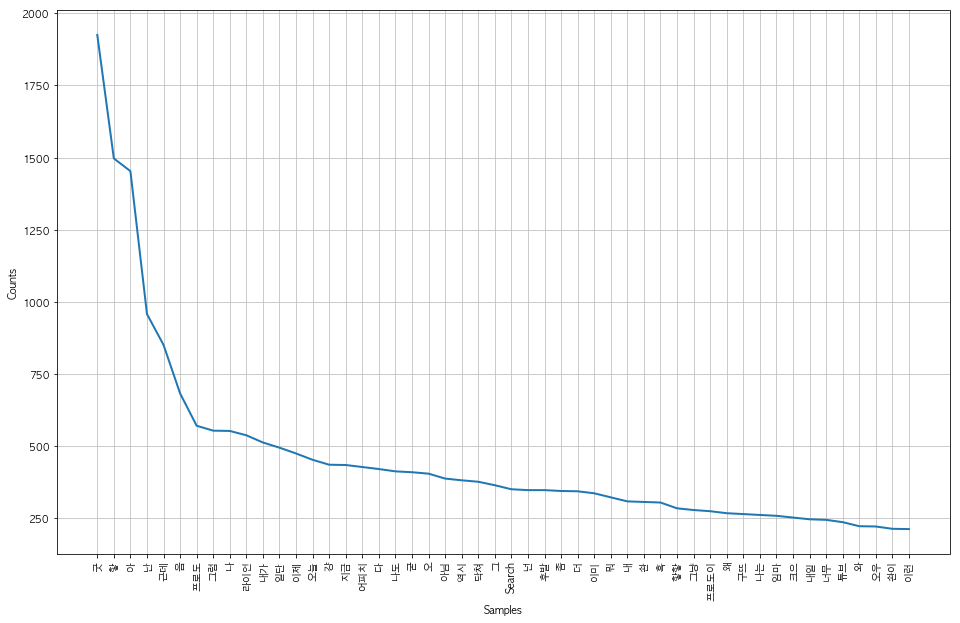

In [15]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

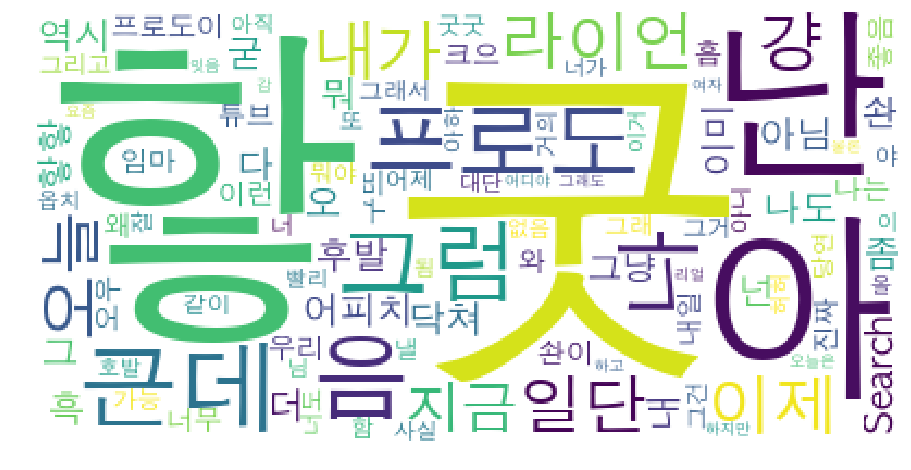

In [16]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
def time_freq_analysis(time_slice):
    
    total_tokens = [token for doc in time_slice for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

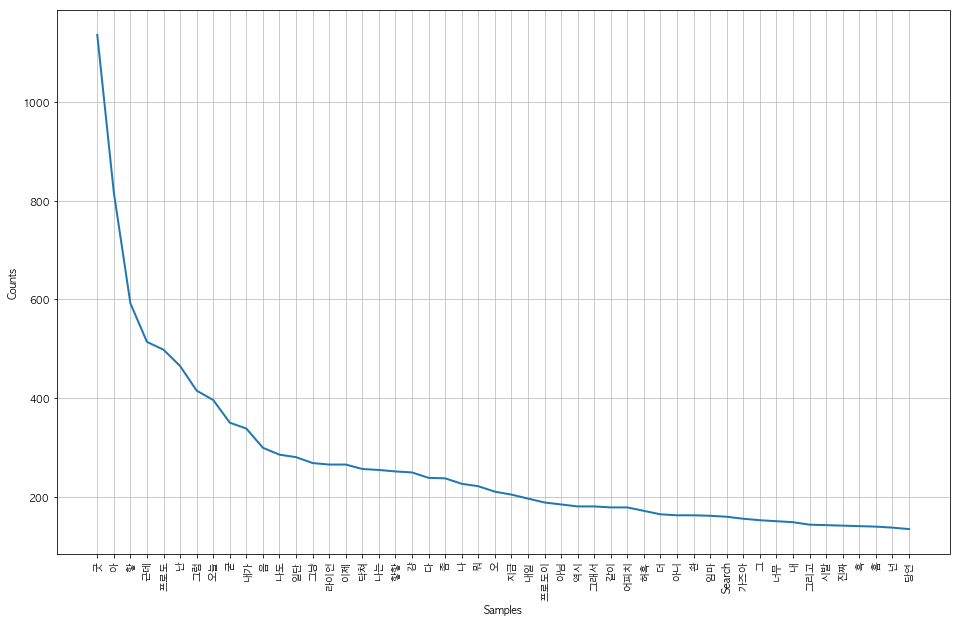

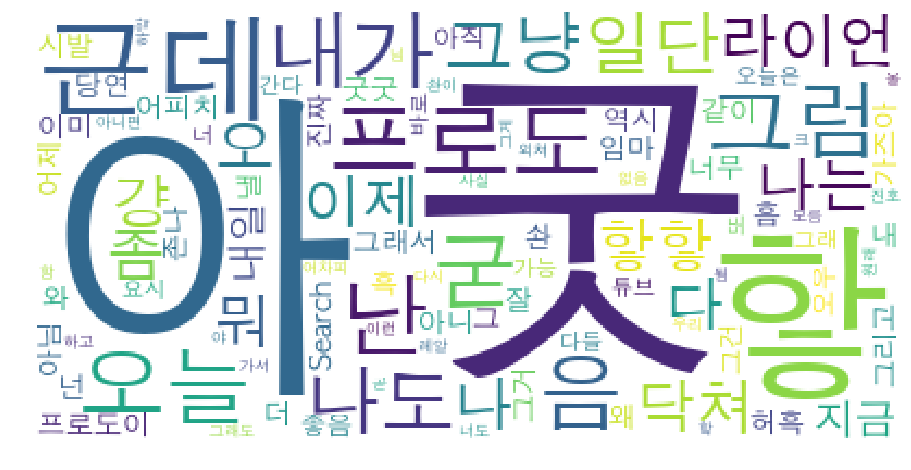

In [18]:
time_freq_analysis(slice1)